### VIII.A. Деревья Решений (Decision Trees): Введение

**Определение:** Дерево решений — это модель машинного обучения, использующая древовидную структуру для принятия решений или предсказаний. Она последовательно задает вопросы о признаках объекта, чтобы определить его класс (в задачах **классификации**) или предсказать числовое значение (в задачах **регрессии**).

**Структура:**

*   **Узлы (Nodes):** Представляют собой проверки значений признаков (например, "Возраст > 30?").
*   **Ветви (Branches/Edges):** Представляют результаты проверок (например, "Да" / "Нет").
*   **Листья (Leaves):** Конечные узлы, содержащие прогноз (класс или числовое значение).

**Ключевые свойства:**

*   **Иерархичность:** Решения принимаются пошагово, от корня к листьям.
*   **Интерпретируемость:** Путь от корня до листа легко проследить и понять логику решения.
*   **Работа с разными типами данных:** Подходят как для числовых, так и для категориальных признаков.
*   **Нелинейность:** Способны моделировать нелинейные зависимости путем разделения пространства признаков на прямоугольные области.

---

### VIII.B. Построение Дерева: Критерии Разделения

**Цель:** Построить дерево, которое наилучшим образом разделяет данные на "чистые" или "однородные" группы в листьях (т.е. чтобы в каждом листе были объекты преимущественно одного класса или с близкими значениями целевой переменной).

**Процесс:** Дерево строится рекурсивно ("разделяй и властвуй"):
1.  Начать с корневого узла, содержащего все данные.
2.  Найти **наилучший признак и порог** для разделения данных в текущем узле на две (или более) дочерние группы. "Наилучшее" разделение — то, которое максимизирует "чистоту" получаемых групп.
3.  Рекурсивно повторить шаг 2 для каждой дочерней группы, пока не будет достигнут критерий остановки (например, достигнута максимальная глубина, узел стал "чистым", в узле слишком мало объектов).

**Критерии измерения "чистоты" (Impurity) и выбора лучшего разделения:**

**Для Классификации:**

*   **Энтропия (Entropy):** Мера неопределенности или "хаоса" в узле.
    $Entropy(S) = - \sum_{i=1}^{k} p_i \log_2(p_i)$
    *   `S`: Набор данных в узле.
    *   `k`: Количество классов.
    *   `p_i`: Доля объектов класса `i` в узле `S`.
    *   Энтропия = 0 для абсолютно "чистого" узла (все объекты одного класса).
    *   Энтропия максимальна для "грязного" узла (классы распределены равномерно).

*   **Прирост информации (Information Gain):** Насколько уменьшается энтропия после разделения узла `S` по признаку `A`. Выбирается признак с **максимальным** приростом информации.
    $Gain(S, A) = Entropy(S) - \sum_{v \in Values(A)} \frac{|S_v|}{|S|} Entropy(S_v)$
    *   `Values(A)`: Возможные значения признака `A`.
    *   `S_v`: Подмножество `S`, где признак `A` имеет значение `v`.
    *   $|S_v| / |S|$: Вес дочернего узла.

*   **Индекс Джини (Gini Impurity):** Альтернативная мера неопределенности, вычислительно проще энтропии. Представляет вероятность неправильной классификации случайно выбранного элемента, если его класс предсказывать случайно пропорционально распределению классов в узле.
    $Gini(S) = 1 - \sum_{i=1}^{k} p_i^2$
    *   Gini = 0 для "чистого" узла.
    *   Gini максимален (близок к 1 для большого числа классов, 0.5 для двух равных классов).
    *   Алгоритмы (например, CART, используемый в `sklearn`) часто минимизируют взвешенную сумму Gini дочерних узлов.

**Для Регрессии:**

*   **Среднеквадратичная ошибка (MSE - Mean Squared Error):** Измеряет дисперсию целевой переменной в узле. Выбирается разделение, которое **минимизирует** взвешенную сумму MSE дочерних узлов.
    $MSE(S) = \frac{1}{|S|} \sum_{y \in S} (y - \bar{y})^2$, где $\bar{y}$ - среднее значение целевой переменной в узле `S`.
*   **Среднее абсолютное отклонение (MAE - Mean Absolute Error):** Альтернатива MSE, менее чувствительна к выбросам.

---

### VIII.C. Переобучение (Overfitting) и Регуляризация Деревьев

**Проблема:** Деревья решений могут легко **переобучиться** — стать слишком сложными, идеально подстроившись под обучающие данные (включая шум), но потеряв способность обобщать на новые данные.

**Причины склонности к переобучению:**

*   **Гибкость:** Могут строить очень глубокие и ветвистые деревья.
*   **Жадный алгоритм построения:** Локально оптимальные решения на каждом шаге не гарантируют глобально оптимальное (и не переобученное) дерево.

**Методы борьбы с переобучением (Регуляризация):** Ограничение сложности дерева.

1.  **Максимальная глубина дерева (`max_depth`):** Ограничивает максимальное количество уровней в дереве. Один из самых эффективных способов.
2.  **Минимальное число объектов для разделения узла (`min_samples_split`):** Узел не будет разделяться, если в нем меньше объектов, чем это значение. Предотвращает создание узлов на основе малого числа данных.
3.  **Минимальное число объектов в листе (`min_samples_leaf`):** Гарантирует, что каждый лист содержит не менее указанного числа объектов. Делает предсказания в листьях более надежными.
4.  **Максимальное количество листьев (`max_leaf_nodes`):** Напрямую ограничивает общее число листьев.
5.  **Минимальное уменьшение impurity (`min_impurity_decrease`):** Узел будет разделен только если это разделение уменьшает impurity на величину, большую или равную этому значению.
6.  **Прунинг (Pruning - "Обрезка"):** Построение полного (возможно, переобученного) дерева, а затем удаление ветвей, которые не дают значимого улучшения на валидационной выборке (Cost-Complexity Pruning).

**Подбор параметров:** Оптимальные значения гиперпараметров регуляризации обычно подбираются с помощью **кросс-валидации**.

---

### VIII.D. Компромисс Смещения и Дисперсии (Bias-Variance Tradeoff)

*   **Простые деревья (малой глубины, с сильной регуляризацией):**
    *   **Высокое смещение (High Bias):** Неспособны уловить сложные закономерности (недообучение). Плохая точность на обучении и тесте.
    *   **Низкая дисперсия (Low Variance):** Мало меняются при изменении обучающих данных.
*   **Сложные деревья (большой глубины, без регуляризации):**
    *   **Низкое смещение (Low Bias):** Хорошо подстраиваются под обучающие данные.
    *   **Высокая дисперсия (High Variance):** Сильно чувствительны к шуму и изменениям в обучающих данных (переобучение). Отличная точность на обучении, плохая на тесте.

**Цель регуляризации:** Найти **баланс**. Уменьшить дисперсию (снизить переобучение), не слишком сильно увеличив смещение (избежать недообучения).

---

### VIII.E. Практический пример: Decision Tree на данных Iris

Используем `sklearn` для построения дерева решений и демонстрации влияния `max_depth`.

Размер обучающей выборки: (105, 4)
Размер тестовой выборки: (45, 4)

Точность на обучающей (без ограничений): 1.0000
Точность на тестовой (без ограничений): 0.9333

Влияние max_depth:
Max depth: 1, Train Acc: 0.6667, Test Acc: 0.6667
Max depth: 2, Train Acc: 0.9714, Test Acc: 0.8889
Max depth: 3, Train Acc: 0.9810, Test Acc: 0.9778
Max depth: 4, Train Acc: 0.9905, Test Acc: 0.8889
Max depth: 5, Train Acc: 1.0000, Test Acc: 0.9333
Max depth: 6, Train Acc: 1.0000, Test Acc: 0.9333
Max depth: 7, Train Acc: 1.0000, Test Acc: 0.9333
Max depth: 8, Train Acc: 1.0000, Test Acc: 0.9333


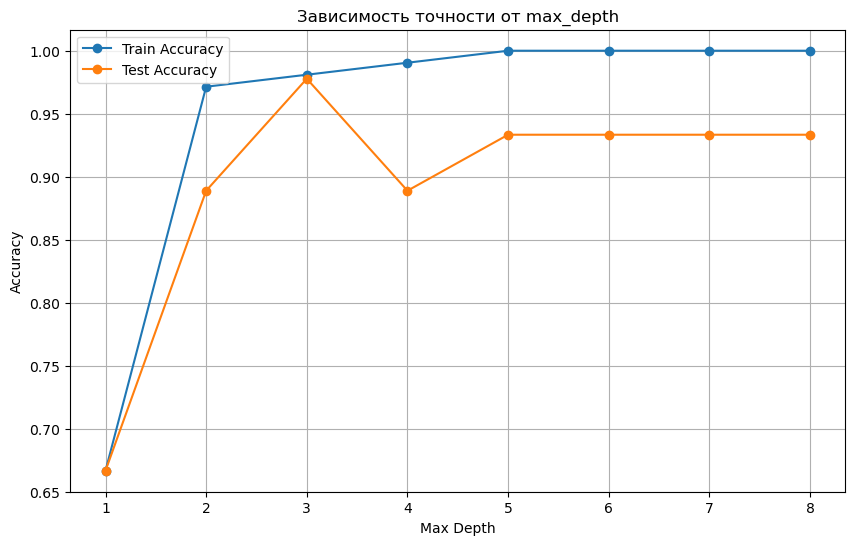


Лучшая глубина на тесте: 3 (Accuracy: 0.9778)


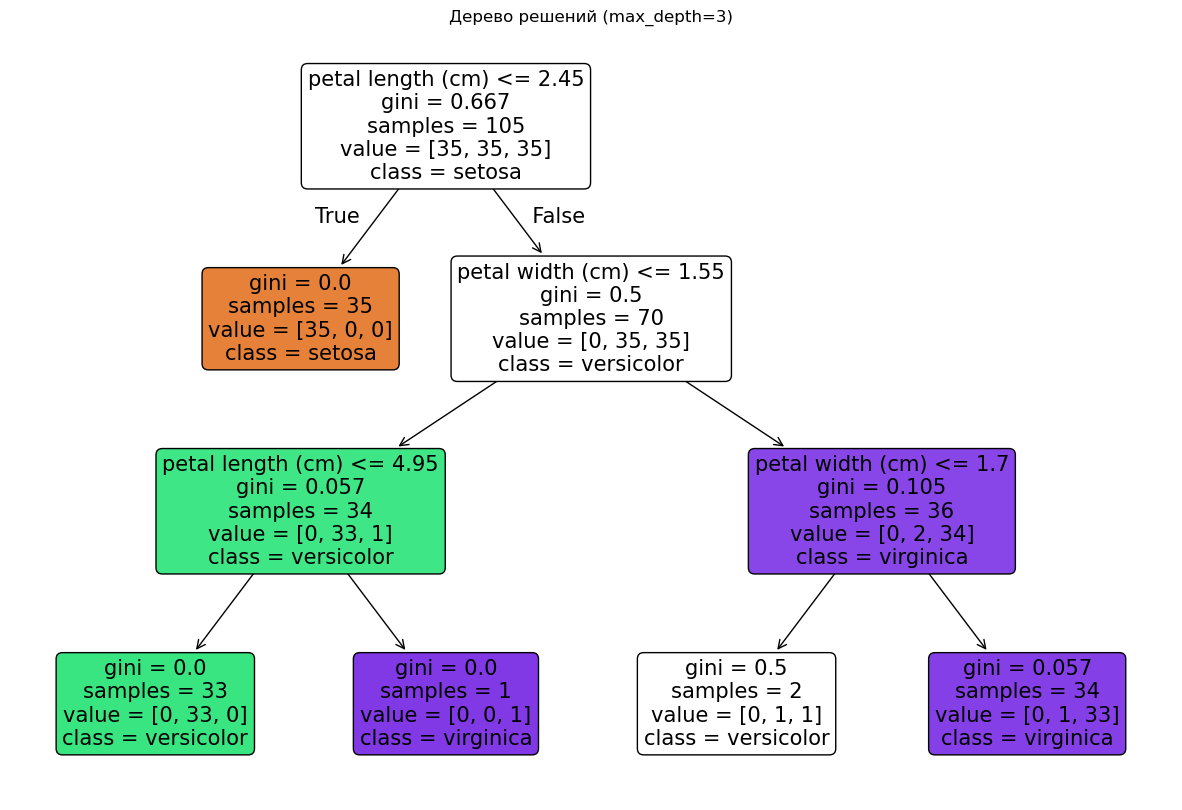

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree # Импортируем plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = list(iris.target_names) # Преобразуем в список для plot_tree

# # Опционально: Посмотрим на данные
# iris_df = pd.DataFrame(X, columns=feature_names)
# iris_df['target'] = y
# print("Пример данных:")
# display(iris_df.head())
# print(f'\nНазвания классов: {class_names}')
# print(f'Названия признаков: {feature_names}')

# 2. Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42, stratify=y) # stratify=y полезно для классификации

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

# 3. Обучение дерева без ограничений
tree_clf_unlim = DecisionTreeClassifier(random_state=42) # Используем Gini по умолчанию
tree_clf_unlim.fit(X_train, y_train)

# Оценка неограниченного дерева
y_train_pred_unlim = tree_clf_unlim.predict(X_train)
train_accuracy_unlimited = accuracy_score(y_train, y_train_pred_unlim)
y_test_pred_unlim = tree_clf_unlim.predict(X_test)
test_accuracy_unlimited = accuracy_score(y_test, y_test_pred_unlim)

print(f'\nТочность на обучающей (без ограничений): {train_accuracy_unlimited:.4f}')
print(f'Точность на тестовой (без ограничений): {test_accuracy_unlimited:.4f}')
# Видим переобучение: точность на обучении 1.0, на тесте ниже.

# 4. Эксперимент с ограничением глубины (max_depth)
max_depths = range(1, 9) # Разные значения max_depth
train_accuracies_depth = []
test_accuracies_depth = []

print("\nВлияние max_depth:")
for depth in max_depths:
    tree_clf_depth = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_clf_depth.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, tree_clf_depth.predict(X_train))
    test_acc = accuracy_score(y_test, tree_clf_depth.predict(X_test))

    train_accuracies_depth.append(train_acc)
    test_accuracies_depth.append(test_acc)
    print(f'Max depth: {depth}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')

# 5. Визуализация результатов эксперимента
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies_depth, marker='o', label='Train Accuracy')
plt.plot(max_depths, test_accuracies_depth, marker='o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от max_depth')
plt.legend()
plt.grid(True)
plt.xticks(max_depths)
plt.show()

# 6. Визуализация лучшего (или просто интересного) дерева
best_depth_idx = np.argmax(test_accuracies_depth) # Индекс лучшей точности на тесте
best_depth = max_depths[best_depth_idx]
print(f"\nЛучшая глубина на тесте: {best_depth} (Accuracy: {test_accuracies_depth[best_depth_idx]:.4f})")

best_tree_clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(best_tree_clf,
          filled=True, # Раскрасить узлы
          rounded=True, # Скруглить углы
          class_names=class_names, # Имена классов
          feature_names=feature_names) # Имена признаков
plt.title(f"Дерево решений (max_depth={best_depth})")
plt.show()

*Наблюдение:* График показывает, что при увеличении `max_depth` точность на обучении растет (или остается 1.0), а точность на тесте сначала растет, достигает пика, а затем может начать падать из-за переобучения. Визуализация дерева помогает понять принятые им решения.

---